#### Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


#### Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.


#### The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/Links to an external site.

#### The data consists of those diagnosed with Parkinson Disease and those who do not.


#### Steps to be followed:



#### 1. Load the dataset

In [69]:
import pandas as pd
import numpy       as np
import scipy.stats as stats
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
from sklearn.linear_model import LogisticRegression
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt
import seaborn as sns
import os

df_detected_parkinson = pd.read_csv(os.getcwd() + '/parkinsons.csv')
df_detected_parkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


#### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [70]:
df_detected_parkinson = df_detected_parkinson.drop(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','spread1', 'spread2', 'D2'], axis=1)
df_detected_parkinson.head()


,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,0.284654,1
1,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,0.368674,1
2,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,0.332634,1
3,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,0.368975,1
4,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,0.410335,1


In [71]:
df_detected_parkinson.describe()

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,0.206552,0.753846
std,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,0.090119,0.431878
min,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,0.044539,0.000000
25%,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,0.137451,1.000000
50%,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,0.194052,1.000000
75%,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,0.252980,1.000000
max,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,0.527367,1.000000


#### 3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

bivariate


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


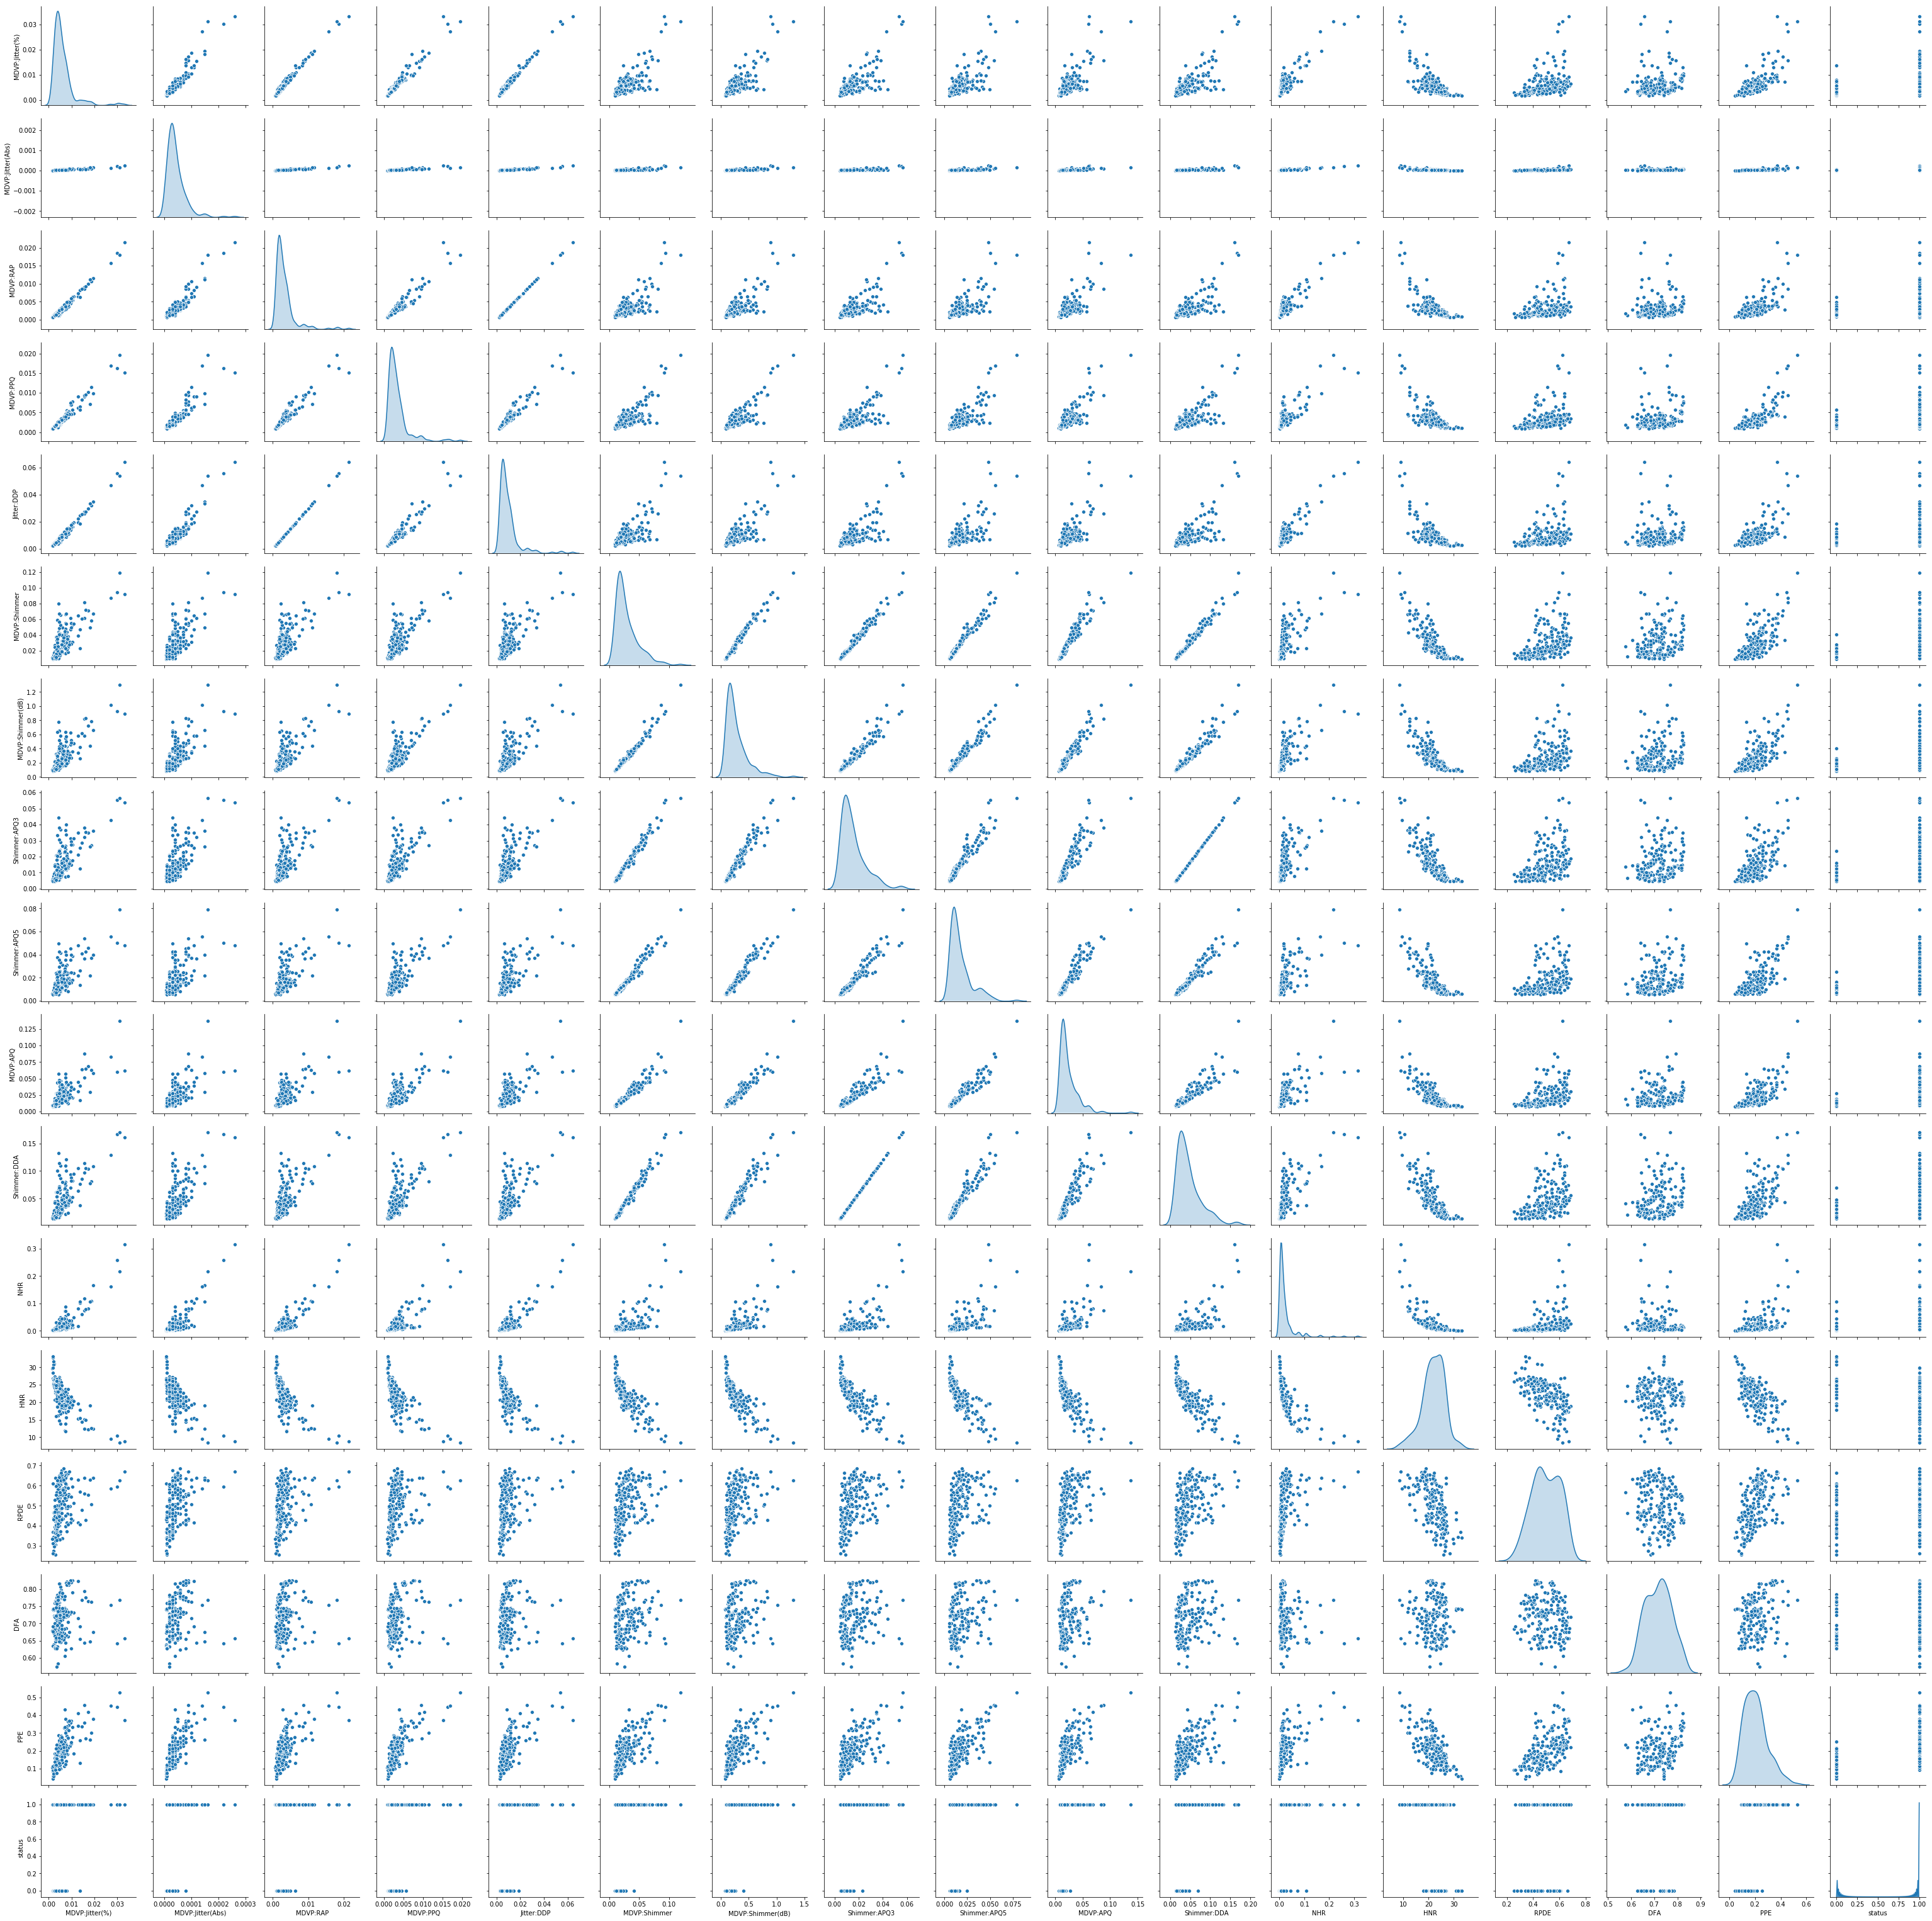

In [72]:
print("bivariate")
sns.pairplot(df_detected_parkinson, diag_kind='kde')

univariate


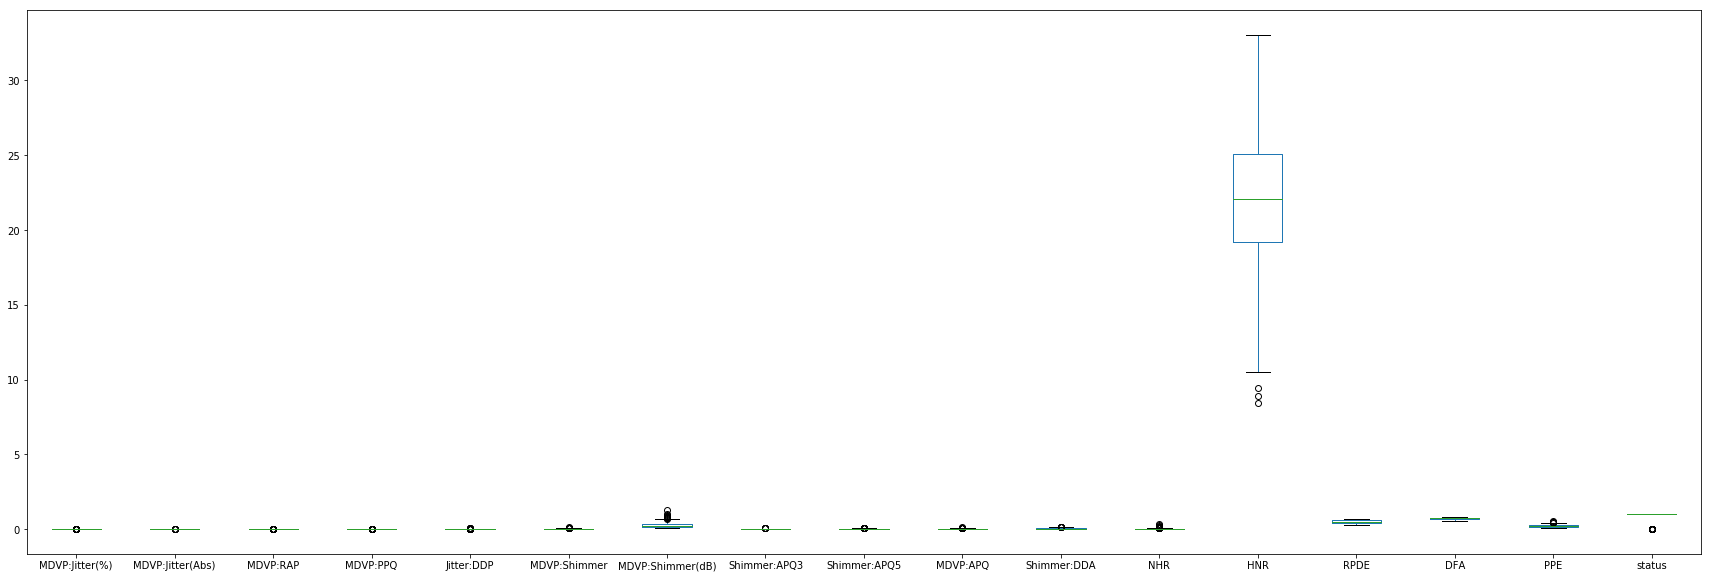

In [73]:
print("univariate")
df_detected_parkinson.plot(kind='box', figsize=(30,10))

#### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [74]:
from sklearn.model_selection import train_test_split
array = df_detected_parkinson.values
X_detect = array[:,:-1] #select independent variables only
y_detect = array[:,-1]
X_train_detect, X_test_detect, y_train_detect, y_test_detect = train_test_split(X_detect, y_detect, test_size=0.30, random_state=1)
print("test and train data split on detected parkinson data")

test and train data split on detected parkinson data


#### 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [75]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

dt_model_detect = DecisionTreeClassifier(criterion = 'entropy' )
dt_model_detect.fit(X_train_detect, y_train_detect)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [76]:
y_predict = dt_model_detect.predict(X_test_detect)

print('\n Model accuracy on the Test data : ')
print(dt_model_detect.score(X_test_detect , y_test_detect))

print('\n Confusion Matrix on the Test data : ')
print(metrics.confusion_matrix(y_test_detect, y_predict))


 Model accuracy on the Test data : 
0.7796610169491526

 Confusion Matrix on the Test data : 
[[12  7]
 [ 6 34]]


##### Predicting values present in parkinsons_updrs file to detect if person has parkisnson or not

In [77]:
print("predicting parkinson status using other set of data")
df_early_parkinson = pd.read_csv(os.getcwd() + '/parkinsons_updrs.csv')
df_early_parkinson = df_early_parkinson.drop(['subject#', 'age', 'sex', 'test_time','motor_UPDRS', 'total_UPDRS'], axis=1)
detect = dt_model_detect.predict(df_early_parkinson)
df_early_parkinson['status'] = detect
df_early_parkinson.head()

predicting parkinson status using other set of data


,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,1.0
1,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0.0
2,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0.0
3,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,1.0
4,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,1.0


#### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [78]:
dt_model_detect1 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, min_samples_leaf = 5, random_state = 100)
dt_model_detect1.fit(X_train_detect, y_train_detect)
y_predict = dt_model_detect1.predict(X_test_detect)

print('\n Model accuracy on the Test data : ')
print(dt_model_detect1.score(X_test_detect , y_test_detect))

print('\n Confusion Matrix on the Test data : ')
print(metrics.confusion_matrix(y_test_detect, y_predict))


 Model accuracy on the Test data : 
0.8135593220338984

 Confusion Matrix on the Test data : 
[[12  7]
 [ 4 36]]


##### Predicting values present in parkinsons_updrs file to detect if person has parkisnson or not

In [79]:
print("predicting parkinson status using other set of data")
df_early_parkinson = pd.read_csv(os.getcwd() + '/parkinsons_updrs.csv')
df_early_parkinson = df_early_parkinson.drop(['subject#', 'age', 'sex', 'test_time','motor_UPDRS', 'total_UPDRS'], axis=1)
detect = dt_model_detect1.predict(df_early_parkinson)
df_early_parkinson['status'] = detect
df_early_parkinson.head()

predicting parkinson status using other set of data


,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,1.0
1,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0.0
2,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,1.0
3,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,1.0
4,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,1.0


#### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfcl = RandomForestClassifier(random_state=1)
rfcl.fit(X_train_detect, y_train_detect)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [82]:
y_predict = rfcl.predict(X_test_detect)
print('\n Model accuracy on the Test data : ')
print(rfcl.score(X_test_detect , y_test_detect))

print('\n Confusion Matrix on the Test data : ')
print(metrics.confusion_matrix(y_test_detect, y_predict))


 Model accuracy on the Test data : 
0.8305084745762712

 Confusion Matrix on the Test data : 
[[11  8]
 [ 2 38]]


##### Predicting values present in parkinsons_updrs file to detect if person has parkisnson or not

In [68]:
print("predicting parkinson status using other set of data")
df_early_parkinson = pd.read_csv(os.getcwd() + '/parkinsons_updrs.csv')
df_early_parkinson = df_early_parkinson.drop(['subject#', 'age', 'sex', 'test_time','motor_UPDRS', 'total_UPDRS'], axis=1)
detect = rfcl.predict(df_early_parkinson)
df_early_parkinson['status'] = detect
df_early_parkinson.head()

predicting parkinson status using other set of data


,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,1.0
1,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,1.0
2,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,1.0
3,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,1.0
4,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,1.0
